<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [73]:
# Task 1-1: use linear regression in sklearn
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(train_data, train_target)
predict = reg.predict(test_data)

# Task 1-2: show intercept and coefficents
print('coefficients: \n', reg.coef_)
print('intercept: \n', reg.intercept_)

# Task 1-3: show errors on training dataset and testing dataset
print("Mean Squared Error: %.2f" % mean_squared_error(test_target,predict))
#print("Variance Score: %.2f" % r2_score(test_target,predict))

coefficients: 
 [[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
  -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
  -3.61165842]]
intercept: 
 [22.79653465]
Mean Squared Error: 24.29


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [71]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
  test = np.dot(X.T,X)
  second = np.dot(np.linalg.inv(test),X.T)
  result = np.dot(second, y)
  return result
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  temp = []
  y = np.array(temp)
  for i in range(np.size(X,0)):
    y = np.append(y,np.sum(np.dot(X[i],w)))
#  print(y)
  return y

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Calling myPredictFun to get the predicted test data result
predict_y = myPredictFun(test_data_intercept, w)

# Task 2-3: show intercept and coefficents
print("intercept: \n", w[0])
print("coefficents: \n", w[1:])

# Task 2-4: show errors on training dataset and testing dataset
print("Mean Squared Error: %.2f" % mean_squared_error(test_target,predict_y))
print(np.sum(np.square(np.subtract(test_target, predict_y.reshape(102,1)))/102))


intercept: 
 [22.79653465]
coefficents: 
 [[-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]
Mean Squared Error: 24.29
24.291119474973566


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

intercept: 
 [22.79653365]
coefficents: 
 [[-0.9249235 ]
 [ 0.14081346]
 [ 0.0825422 ]
 [ 0.79079705]
 [-2.27407547]
 [ 3.30552849]
 [ 0.0461996 ]
 [-2.50445105]
 [ 1.16026242]
 [-0.28914461]
 [-2.2675395 ]
 [ 1.14729502]
 [-3.47743485]]
Mean Squared Error: 25.87
25.869204759575947
(50,)


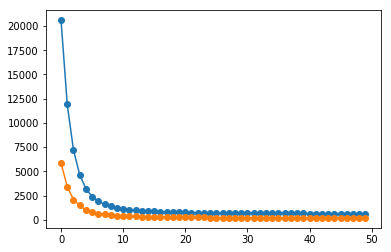

In [210]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


import random

# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
  itemp = []
  stemp = []
  weight = np.array(itemp)
  loss = np.array(stemp)
  lost = np.array([])
  for i in range(np.size(X[0])):
    weight = np.append(weight,random.randrange(-10, 10))
  weight = weight.reshape(14,1)
  for i in range(numItrs):
    c = learning_rate * (1/np.size(weight))
    diff = c * np.dot(X.T, (y - (np.dot(X,weight))))
    weight = np.add(weight, diff)
    loss = np.append(loss, (1/np.size(weight)) * np.sum(np.square(y - np.dot(X,weight))))
    lost = np.append(lost, (1/np.size(weight)) * np.sum(np.square(test_target - np.dot(test_data_intercept, weight))))
  return weight, loss, lost

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  temp = []
  y = np.array(temp)
  for i in range(np.size(X,0)):
    y = np.append(y,np.sum(np.dot(X[i],w)))
  return y

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss, lost = myGradientDescentFun(train_data_intercept,train_target,.01,50)
# Calling myPredictFun to get the predicted test data result
predict_y = myPredictFun(test_data_intercept, w)

# Task 3-3: show intercept and coefficents
print("intercept: \n", w[0])
print("coefficents: \n", w[1:])

# Task 3-4: show errors on training dataset and testing dataset
print("Mean Squared Error: %.2f" % mean_squared_error(test_target,predict_y))
print(np.sum(np.square(np.subtract(test_target, predict_y.reshape(102,1)))/102))
print(np.shape(lost))

# Task 3-5: plot learning curves showing training errors and testing errors along iterations
plt.plot(range(np.size(loss)), loss, 'o-')
plt.plot(range(np.size(lost)), lost, 'o-')

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

intercept: 
 [22.75135328]
coefficents: 
 [[ 0.0899133 ]
 [ 1.12732365]
 [ 0.25024918]
 [ 1.4640936 ]
 [-0.13132859]
 [ 2.63182661]
 [-0.87351616]
 [-3.12648599]
 [ 1.1394843 ]
 [-0.7827973 ]
 [-1.03771705]
 [ 0.82848014]
 [-3.76780848]]
Mean Squared Error: 25.77
25.767510494777838


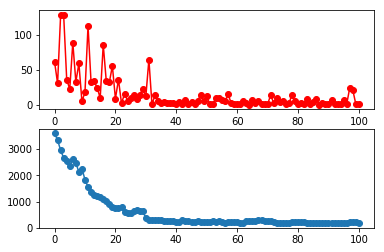

In [215]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
  itemp = []
  stemp = []
  weight = np.array(itemp)
  loss = np.array(stemp)
  
  lost = np.array([])

  for i in range(14):
    weight = np.append(weight,random.randrange(-4, 4))
  weight = weight.reshape(14,1)
  
  for batch in batchGen(X, y, batchsize):
    nX, ny = batch
    

#  for i in range(numItrs):
    c = learning_rate * (1/np.size(weight))
    diff = c * np.dot(nX.T, (ny - (np.dot(nX,weight))))
    weight = np.add(weight, diff)
    loss = np.append(loss, (1/np.size(weight)) * np.sum(np.square(ny - np.dot(nX,weight))))    
    lost = np.append(lost, (1/np.size(weight)) * np.sum(np.square(np.subtract(test_target, np.dot(test_data_intercept, weight)))))
  return weight, loss, lost

def batchGen(X, y, batchsize):
  for i in np.arange(0, 404, batchsize):
    yield(X[i: i + batchsize], y[i: i + batchsize])
  
  
# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  temp = []
  y = np.array(temp)
  for i in range(np.size(X,0)):
    y = np.append(y,np.sum(np.dot(X[i],w)))
  return y

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss, lost = myGradientDescentFun(train_data_intercept,train_target,.19,101,4)

# Calling myPredictFun to get the predicted test data result
predict_y = myPredictFun(test_data_intercept, w)




# Task 4-3: show intercept and coefficents
print("intercept: \n", w[0])
print("coefficents: \n", w[1:])

# Task 4-4: show errors on training dataset and testing dataset
print("Mean Squared Error: %.2f" % mean_squared_error(test_target,predict_y))
print(np.sum(np.square(np.subtract(test_target, predict_y.reshape(102,1)))/102))


#print(loss)
# Task 4-5: plot learning curves showing training errors and testing errors along bath
plt.subplot(2, 1, 1)
plt.plot(range(np.size(loss)), loss, 'o-', color="red")
plt.subplot(2, 1, 2)
plt.plot(range(np.size(lost)), lost, 'o-')